# K-Means Clustering

For this project we will attempt to use KMeans Clustering to cluster Compounds in 3 groups:
        FDA,
        Biofacquim,
        AFRODB

Note that, we have the "Library" labels for this data set, 
but we will NOT use them for the K-Means clustering algorithm
(unsupervised learning algorithm).

In this case we will use the labels to try to get an idea of 
how well the algorithm performed, but you won't usually do 
this for Kmeans

So the classification report and confusion matrix at the end of 
this project, do not truly make sense in a real world setting!

## Import Libraries

** Import the libraries you usually use for data analysis.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data

In [2]:
pwd

'/home/babs/Documents/DIFACQUIM/CABANA_CHEMOINFORMATICS/Day_3/UnsupervisedLearning_Clustering/K_Means'

Please configure your location to read .csv file

In [3]:
Data = pd.read_csv("Data_cluster.csv",index_col=0)

In [4]:
Data.columns

Index(['ID Database', 'Name', 'SMILES', 'HBA', 'HBD', 'RB', 'LogP', 'TPSA',
       'MW', 'Heavy Atom', 'Ring Count', 'Fraction CSP3', 'subLibrary',
       'Library', 'Target'],
      dtype='object')

In [7]:
Data.shape

(2704, 15)

In [8]:
#Select descriptors to train model (Numerical Data)
features = ['HBA', 'HBD', 'RB', 'LogP', 'TPSA', 'MW', 
            'Heavy Atom', 'Ring Count', 'Fraction CSP3']

In [10]:
#Create a new data frame with numerical data
df = Data[features]
df

,HBA,HBD,RB,LogP,TPSA,MW,Heavy Atom,Ring Count,Fraction CSP3
0,7.0,3.0,51.0,22.41390,105.45,1194.003,85.0,85.0,85.0
1,27.0,14.0,18.0,-3.53560,418.89,1195.309,83.0,83.0,83.0
2,26.0,14.0,17.0,-2.65880,393.98,1195.353,83.0,83.0,83.0
3,11.0,3.0,61.0,16.99360,201.42,1117.597,79.0,79.0,79.0
4,8.0,3.0,52.0,17.01800,122.52,943.489,67.0,67.0,67.0
5,6.0,1.0,4.0,8.99260,45.30,861.191,65.0,65.0,65.0
6,17.0,14.0,5.0,4.73830,310.91,850.782,62.0,62.0,62.0
7,8.0,5.0,12.0,11.19094,144.52,782.974,58.0,58.0,58.0
8,8.0,6.0,11.0,11.06024,155.52,782.974,58.0,58.0,58.0
9,7.0,4.0,32.0,13.59130,120.36,803.178,58.0,58.0,58.0


In [7]:
#df.info()

In [8]:
#Statistical values
df.describe()

,HBA,HBD,RB,LogP,TPSA,MW,Heavy Atom,Ring Count,Fraction CSP3
count,2704.000000,2704.000000,2704.000000,2704.000000,2704.000000,2704.000000,2704.000000,2704.000000,2704.000000
mean,4.826923,2.012204,4.272189,3.014391,78.040211,347.178019,24.749630,24.749630,24.749630
std,3.632233,2.081452,4.967362,2.512787,56.861477,167.969202,12.005818,12.005818,12.005818
min,0.000000,0.000000,0.000000,-5.935100,0.000000,16.043000,1.000000,1.000000,1.000000
25%,3.000000,1.000000,2.000000,1.546100,46.150000,254.115000,18.000000,18.000000,18.000000
50%,4.000000,2.000000,3.000000,2.897000,67.715000,332.474000,24.000000,24.000000,24.000000
75%,6.000000,3.000000,5.000000,4.276750,98.360000,414.718000,30.000000,30.000000,30.000000
max,47.000000,19.000000,63.000000,22.413900,656.850000,2501.126000,174.000000,174.000000,174.000000


## Exploratory Data Analysis

It's time to create some data visualizations!

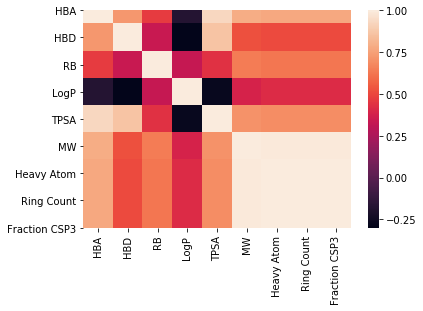

In [9]:
sns.heatmap(df.corr())

/home/babs/anaconda3/envs/my-rdkit-env/lib/python3.6/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


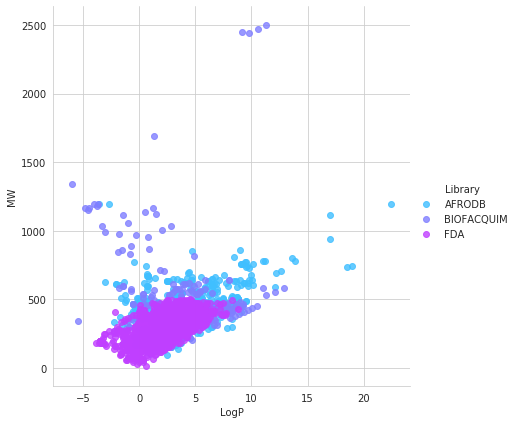

In [11]:
sns.set_style('whitegrid')
sns.lmplot('LogP','MW',data=Data, hue='Library',
           palette='cool',size=6,aspect=1,fit_reg=False)

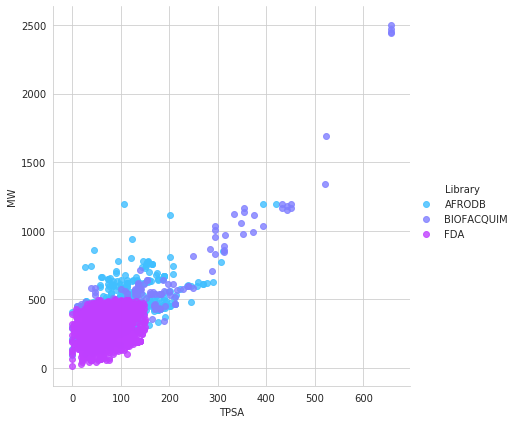

In [12]:
sns.set_style('whitegrid')
sns.lmplot('TPSA','MW',data=Data, hue='Library',
           palette='cool',size=6,aspect=1,fit_reg=False)

/home/babs/anaconda3/envs/my-rdkit-env/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


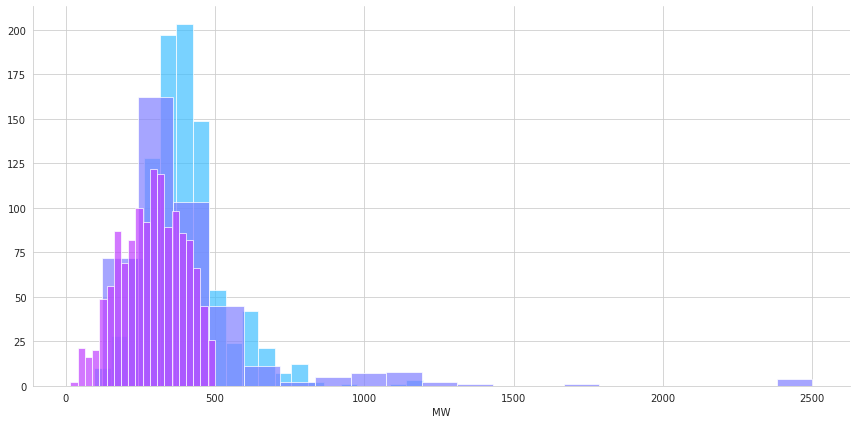

In [13]:
g = sns.FacetGrid(Data,hue="Library",palette='cool',size=6,aspect=2)
g = g.map(plt.hist,'MW',bins=20,alpha=0.7)

**Create a similar histogram for the Grad.Rate column.**

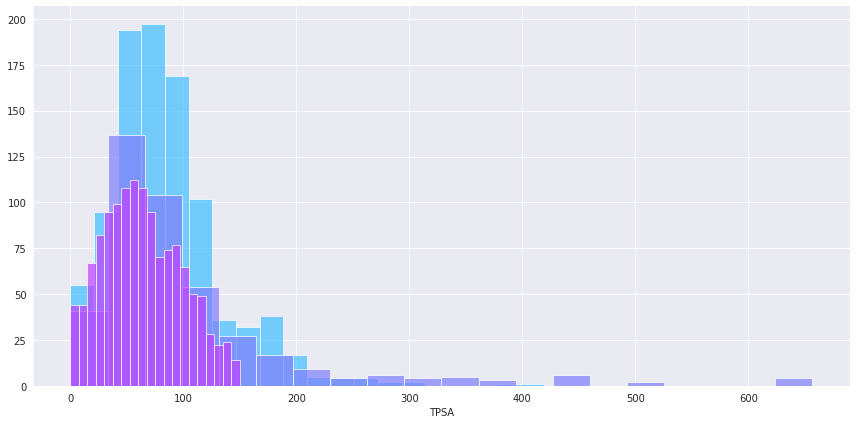

In [13]:
sns.set_style('darkgrid')
g = sns.FacetGrid(Data,hue="Library",palette='cool',size=6,aspect=2)
g = g.map(plt.hist,'TPSA',bins=20,alpha=0.7)

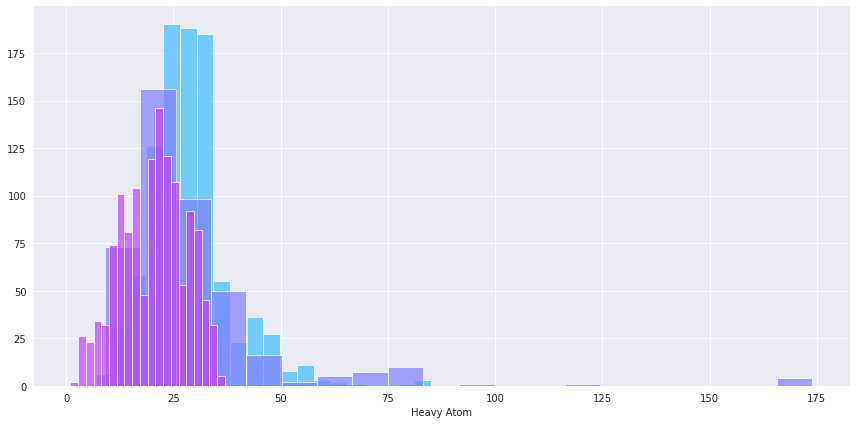

In [14]:
sns.set_style('darkgrid')
g = sns.FacetGrid(Data,hue="Library",palette='cool',size=6,aspect=2)
g = g.map(plt.hist,'Heavy Atom',bins=20,alpha=0.7)

"""K Means Cluster Creation """

In [14]:
from sklearn.cluster import KMeans

** Create an instance of a K Means model with 2 clusters.**

In [15]:
kmeans = KMeans(n_clusters=3)

**Fit the model to all the data except for the Private label.**

In [16]:
kmeans.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

** What are the cluster center vectors?**

In [17]:
kmeans.cluster_centers_

array([[   3.44452198,    1.55547802,    2.85694348,    2.11631771,
          58.48973482,  246.6116698 ,   17.54361479,   17.54361479,
          17.54361479],
       [  25.4       ,   11.65714286,   26.77142857,    1.71301429,
         384.81      , 1236.99648571,   85.8       ,   85.8       ,
          85.8       ],
       [   5.84708738,    2.26860841,    5.27588997,    4.09245613,
          92.01989482,  438.57602146,   31.37540453,   31.37540453,
          31.37540453]])

In [18]:
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [20]:
kmeans.labels_

array([1, 1, 1, ..., 2, 0, 0], dtype=int32)

## Evaluation

There is no perfect way to evaluate clustering if you don't have the labels, however since this is just an exercise, we do have the labels, so we take advantage of this to evaluate our clusters, keep in mind, you usually won't have this luxury in the real world.

** Create a new column for df called 'Cluster', which is:
    Afro -> 0,
    Biofacquim -> 1,
    FDA -> 2,

In [21]:
#Add predictions to Data
Data['Cluster'] = kmeans.labels_

/home/babs/anaconda3/envs/my-rdkit-env/lib/python3.6/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


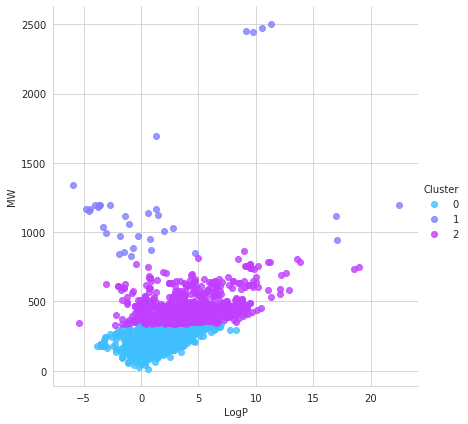

In [22]:
#Plot scatter plots again
#Now hue is "Cluster" (predicted result)
sns.set_style('whitegrid')
sns.lmplot('LogP','MW',data=Data, hue='Cluster',
           palette='cool',size=6,aspect=1,fit_reg=False)

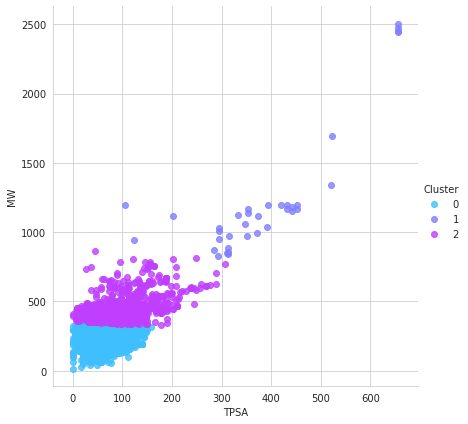

In [23]:
sns.set_style('whitegrid')
sns.lmplot('TPSA','MW',data=Data, hue='Cluster',
           palette='cool',size=6,aspect=1,fit_reg=False)

In the last plot patters are similar, 
we can say that cluster predictions is not so bad

** Create a confusion matrix and classification report to see how well the Kmeans clustering worked without being given any labels.**

In [24]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(Data['Target'],kmeans.labels_))
print(classification_report(Data['Target'],kmeans.labels_))

[[  0   0   0   0]
 [335 613   6   0]
 [213 181  29   0]
 [885 442   0   0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.50      0.64      0.56       954
           2       0.83      0.07      0.13       423
           3       0.00      0.00      0.00      1327

    accuracy                           0.24      2704
   macro avg       0.33      0.18      0.17      2704
weighted avg       0.30      0.24      0.22      2704



/home/babs/anaconda3/envs/my-rdkit-env/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/babs/anaconda3/envs/my-rdkit-env/lib/python3.6/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
